In [1]:
import datetime
from collections import Counter

from tqdm import tqdm
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import pandas as pd

from preprocessor import KoreanPreprocessor
from naver_news import NaverNewsCrawler
from tf_idf import tf_idf, idf, tf
from topic_modeling import TopicModeling


def create_wordcloud(frequency: dict, font_path="NanumGothic.ttf"):
    wc = WordCloud(
        background_color="white",
        width=1000,
        height=1000,
        max_words=100,
        max_font_size=300,
        font_path=font_path,
    )

    wc.generate_from_frequencies(frequency)

    plt.figure(figsize=(7, 7))
    plt.axis("off")
    plt.imshow(wc.generate_from_frequencies(frequency))
    plt.savefig("word_cloud")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\freed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
crawler = NaverNewsCrawler()

keywords = ["마이데이터", "마이데이터 개인정보 보호", "마이데이터 개인정보 활용"]
start_date = "2017-06-19"
end_date = "2023-07-30"

for keyword in keywords:
    data = crawler.run(keyword, start_date, end_date)

    today = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"{keyword}_{today}_naver.csv"
    data.to_csv(filename, encoding="utf-8-sig")
    print(f"Succeed to save {filename}")

In [20]:
preprocessor = KoreanPreprocessor()
filename = "sample.csv"
df = pd.read_csv(filename, encoding="utf-8-sig")

df["text"] = df["text"].astype(str)
df["text"] = df["text"].str.replace(pat=r"[^\w]", repl=r" ", regex=True)
df["text"] = df["text"].str.replace(".", "")

In [21]:
df["text"] = df["text"].apply(preprocessor.extract_keyword)

In [10]:
# pre-processed data
df.head(20)

,Unnamed: 0,url,text,title,media,date
0,0,https://n.news.naver.com/mnews/article/003/000...,제주 뉴시스 장호 기자 제주 지역 최강 한파 오전 제주국제공항 활주로 정도 눈보라 ...,"제주여행사 “제주항공, 폭설 당일 결항 이유 해명” 촉구",뉴시스,2018-01-22
1,1,https://n.news.naver.com/mnews/article/277/000...,아시아 경제 연진 기자 이달 김치냉장고 고객 사은 행사 진행 최신 김치냉장고 10대...,"GS샵, 11월 한달간 김치냉장고 10대 경품",아시아경제,2017-11-03
2,2,https://n.news.naver.com/mnews/article/003/000...,서울 뉴시스 이영화 기자 최종 오른쪽 금융 위원장 오전 서울 강남구 캠프 금융 분야...,'금융분야 마이데이터 산업 도입을 위한 간담회',뉴시스,2018-07-18
3,3,https://n.news.naver.com/mnews/article/082/000...,공간 드림 센터 개소식 서울 논현동 서울 지역 본부 가운데 박명 사장 축사 국토 정...,"국토정보공사, 서울 논현동에 'LX공간드림센터' 개소… 유망 창업기업 지원",부산일보,2018-03-12
4,4,https://n.news.naver.com/mnews/article/008/000...,머니투데이 지수 기자 편집 자주 뉴스 현장 희로애락 가운데 기사 생각 세상 우보 머...,[우보세]과기정통부의 '마이웨이'가 걱정되는 이유,머니투데이,2017-08-29
5,5,https://n.news.naver.com/mnews/article/030/000...,인공지능 활용 정보 기업 전환 가속 미국 최대 이동 통신 사업자 이즈 진두지휘 로나...,"버라이즌, ""인공지능(AI) 기반 정보기업으로 거듭나겠다""",전자신문,2017-08-11
6,6,https://n.news.naver.com/mnews/article/001/001...,치앙마이 코타키나발루 연합뉴스 연재 기자 동남아 차량 공유 교통 문제 고생 필요 아...,[길따라 멋따라] 우버? 아니 그랩…차량공유 서비스로 여행하기,연합뉴스,2018-05-05
7,7,https://n.news.naver.com/mnews/article/277/000...,최종 금융 위원장 오른쪽 서울 강남구 캠프 금융 분야 마이 데이터 산업 도입 간담회...,"[포토] 금융위원회, 마이데이터 산업 도입을 위한 간담회 개최",아시아경제,2018-07-18
8,8,https://n.news.naver.com/mnews/article/009/000...,경태 총괄 경험 올해 청년 취업 시장 한파 지속 예상 가운데 이색 직업 선택 취업 ...,"[금융권 취업 틈새 공략] ""스펙 없이도 P2P금융 리딩할 수 있어요""",매일경제,2018-01-23
9,9,https://n.news.naver.com/mnews/article/047/000...,오마 팩트 이동 통신 폐지 반대 근거 주장 거짓 오마이뉴스 김시연 그래픽 고정 폐지...,기본료 폐지는 포퓰리즘? 통신사 3대 거짓말,오마이뉴스,2017-06-29


In [ ]:
tokens = []
for text in df["text"]:
    tokens.extend(text.split())

word_freq = Counter(tokens)
create_wordcloud(
    dict(filter(lambda x: x[1] > 1, word_freq.items())),
)

In [12]:
word_freq.most_common(20)

[('데이터', 163430),
 ('금융', 137864),
 ('서비스', 123659),
 ('마이', 76468),
 ('제공', 57270),
 ('정보', 55133),
 ('사업', 53282),
 ('고객', 51248),
 ('기업', 48565),
 ('플랫폼', 46090),
 ('디지털', 45761),
 ('활용', 36206),
 ('관리', 36109),
 ('은행', 32469),
 ('투자', 32190),
 ('시장', 30389),
 ('상품', 29639),
 ('기반', 28942),
 ('산업', 27924),
 ('혁신', 27180)]

In [23]:
docs = df["text"]
voca = [word for word, _ in word_freq.most_common(20)]
# voca = list(set([word for doc in docs for word in doc.split()]))

# TF
tf_list = [[tf(voca[j], docs[i]) for j in range(len(voca))] for i in range(len(docs))]
tf_res = pd.DataFrame(tf_list, columns=voca)
tf_res

,데이터,금융,서비스,마이,제공,정보,사업,고객,기업,플랫폼,디지털,활용,관리,은행,투자,시장,상품,기반,산업,혁신
0,1,0,0,2,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,4,0,0,0
2,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2,0,0,0,2,11,1,0,5,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,1,3,1,0,1,1,0,0,0,0,7,0,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28270,9,1,4,1,0,0,3,0,1,1,1,2,0,0,11,3,0,7,0,3
28271,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0
28272,14,4,1,13,3,2,3,0,0,0,1,0,3,0,0,0,1,0,1,0
28273,1,0,3,5,3,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0


In [28]:
# IDF
idf_list = [idf(voca[j], docs) for j in range(len(voca))]
idf_res = pd.DataFrame(idf_list, index=voca, columns=["IDF"])
idf_res.sort_values(by="IDF", ascending=False)

,IDF
혁신,1.091739
산업,1.089844
투자,1.048131
은행,0.999115
상품,0.998347
시장,0.949095
디지털,0.867458
기반,0.758056
고객,0.753613
플랫폼,0.738252


In [35]:
tf_idf_df = tf_idf(voca, docs)
tf_idf_df

,데이터,금융,서비스,마이,제공,정보,사업,고객,기업,플랫폼,디지털,활용,관리,은행,투자,시장,상품,기반,산업,혁신
0,0.002372,0.000000,0.00000,0.098143,1.471717,0.000000,0.000000,0.753613,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.002372,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.260838,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.993388,0.000000,0.000000,0.000000
2,0.002372,0.818904,0.00000,0.049071,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.089844,0.000000
3,0.004745,0.000000,0.00000,0.000000,0.735858,5.217996,0.492949,0.000000,3.110326,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.004745,0.000000,0.00000,0.000000,0.367929,1.423090,0.492949,0.000000,0.622065,0.738252,0.000000,0.000000,0.000000,0.0,7.336917,0.000000,0.000000,0.758056,2.179689,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28270,0.021352,0.409452,1.09384,0.049071,0.000000,0.000000,1.478848,0.000000,0.622065,0.738252,0.867458,1.286475,0.000000,0.0,11.529441,2.847286,0.000000,5.306392,0.000000,3.275218
28271,0.002372,0.000000,0.27346,0.049071,0.367929,0.000000,0.492949,0.753613,0.622065,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.949095,0.000000,0.000000,0.000000,0.000000
28272,0.033214,1.637807,0.27346,0.637928,1.103787,0.948727,1.478848,0.000000,0.000000,0.000000,0.867458,0.000000,2.082308,0.0,0.000000,0.000000,0.998347,0.000000,1.089844,0.000000
28273,0.002372,0.000000,0.82038,0.245357,1.103787,0.000000,0.000000,0.000000,0.000000,0.738252,0.000000,0.643238,0.000000,0.0,0.000000,0.000000,0.000000,0.758056,0.000000,0.000000


In [38]:
texts = [doc.split() for doc in docs]

topic_modeler = TopicModeling(texts)

num_topics_range = range(2, 20)
models = []
results = []
for num_topics in tqdm(num_topics_range):
    model = topic_modeler.train_lda(num_topics)
    models.append(model)
    coherence = topic_modeler.compute_coherence(model)
    perplexity = topic_modeler.compute_perplexity(model)

    results.append((num_topics, coherence, perplexity))

100%|██████████| 18/18 [1:06:13<00:00, 220.76s/it]


In [39]:
# num_topics, coherence_lda, perplexity
results

[(2, 0.4725092351987078, -7.663065046812835),
 (3, 0.47023309025519094, -7.590843421342422),
 (4, 0.5114750930035554, -7.538340585601555),
 (5, 0.5004917616499028, -7.499622791083422),
 (6, 0.507510497897116, -7.473093812749846),
 (7, 0.49975345762000184, -7.4666036915982685),
 (8, 0.4944624989878962, -7.480533272654988),
 (9, 0.5113368011446244, -7.504098455136632),
 (10, 0.525363940737787, -7.544931103775656),
 (11, 0.5492154726167849, -7.567317135913128),
 (12, 0.5168163245185532, -7.643261538222788),
 (13, 0.5117374470430592, -7.671222449554888),
 (14, 0.5081239184754808, -7.713884428247089),
 (15, 0.5162912565112054, -7.740786130999299),
 (16, 0.5221420120131536, -7.7608692266849895),
 (17, 0.5246647608778696, -7.797199530376283),
 (18, 0.5285056574173904, -7.819914162554938),
 (19, 0.5388580327349994, -7.8386392807467775)]

In [45]:
df = pd.DataFrame(results, columns=["num_topics", "coherence", "perplexity"])
df.head()

,num_topics,coherence,perplexity
0,2,0.472509,-7.663065
1,3,0.470233,-7.590843
2,4,0.511475,-7.538341
3,5,0.500492,-7.499623
4,6,0.507510,-7.473094


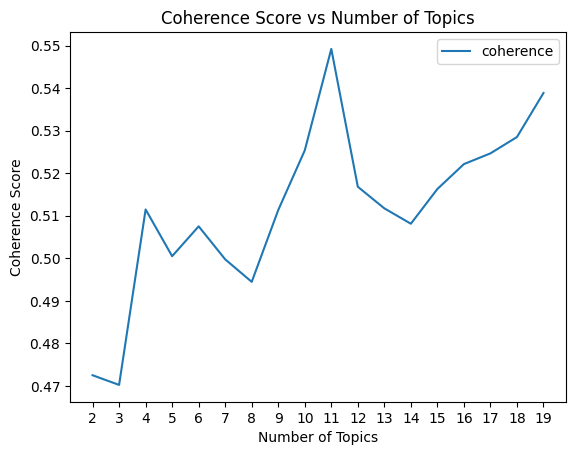

In [46]:
# plot the coherence score vs number of topics

ax = df.plot(
    x="num_topics",
    y="coherence",
    kind="line",
)
ax.set_xlabel("Number of Topics")
ax.set_ylabel("Coherence Score")
ax.set_title("Coherence Score vs Number of Topics")
ax.set_xticks(num_topics_range)

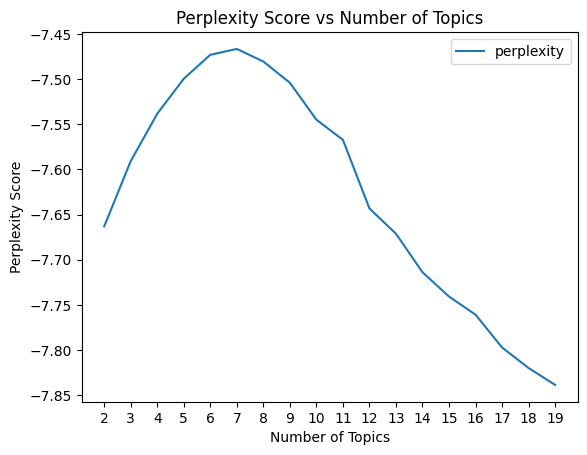

In [47]:
# plot the coherence score vs number of topics
ax = df.plot(
    x="num_topics",
    y="perplexity",
    kind="line",
)
ax.set_xlabel("Number of Topics")
ax.set_ylabel("Perplexity Score")
ax.set_title("Perplexity Score vs Number of Topics")
ax.set_xticks(num_topics_range)

In [50]:
# Gensim LDA model display

# Choose the model with the highest coherence score
model = models[5]
topic_modeler.visualize(model)

TypeError: 'module' object is not subscriptable